# 분류 모델 실습

## pima-indians-diabetes.csv 파일을 읽어서, 당뇨병을 분류하는 모델을 만드시오.

컬럼 정보 :

Preg=no. of pregnancy

Plas=Plasma

Pres=blood pressure

skin=skin thickness

test=insulin test

mass=body mass

pedi=diabetes pedigree function

age=age

class=target(diabetes of not, 1:diabetic, 0:not diabetic)

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('../data/pima-indians-diabetes.csv')

In [4]:
df.isna().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [5]:
df.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# Nan은 없다. 0이면 안되는 데이터들은 있다. 
# 0으로 들어있는것을 Nan으로 바꾸면, 처리하기가 쉽다. 

In [8]:
import numpy as np

In [10]:
df.loc[ : , 'Plas' : 'mass'  ] = df.loc[ : , 'Plas' : 'mass'  ].replace( 0, np.nan )

/var/folders/1r/4s7fnpyj5rvgjd989sjv1l680000gn/T/ipykernel_18443/212986600.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[148.  85. 183.  89. 137. 116.  78. 115. 197. 125. 110. 168. 139. 189.
 166. 100. 118. 107. 103. 115. 126.  99. 196. 119. 143. 125. 147.  97.
 145. 117. 109. 158.  88.  92. 122. 103. 138. 102.  90. 111. 180. 133.
 106. 171. 159. 180. 146.  71. 103. 105. 103. 101.  88. 176. 150.  73.
 187. 100. 146. 105.  84. 133.  44. 141. 114.  99. 109. 109.  95. 146.
 100. 139. 126. 129.  79.  nan  62.  95. 131. 112. 113.  74.  83. 101.
 137. 110. 106. 100. 136. 107.  80. 123.  81. 134. 142. 144.  92.  71.
  93. 122. 163. 151. 125.  81.  85. 126.  96. 144.  83.  95. 171. 155.
  89.  76. 160. 146. 124.  78.  97.  99. 162. 111. 107. 132. 113.  88.
 120. 118. 117. 105. 173. 122. 170.  84.  96. 125. 100.  93. 129. 105.
 128. 106. 108. 108. 154. 102.  57. 106. 147.  90. 136. 114. 156. 153.
 188. 152.  99. 109.

In [16]:
df

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [12]:
df.loc[:, 'Plas':'mass'] = df.loc[:, 'Plas':'mass'].mask(df.loc[:, 'Plas':'mass'] == 0, np.nan)

In [14]:
cols = df.loc[:, 'Plas':'mass'].columns  # 대상 열 이름 리스트
df[cols] = df[cols].replace(0, np.nan)

In [17]:
df.isna().sum()

Preg       0
Plas       5
Pres      35
skin     227
test     374
mass      11
pedi       0
age        0
class      0
dtype: int64

In [19]:
df = df.dropna()

In [23]:
df.reset_index(drop=True , inplace=True)

In [24]:
df

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
1,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
2,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
3,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
4,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
387,0,181.0,88.0,44.0,510.0,43.3,0.222,26,1
388,1,128.0,88.0,39.0,110.0,36.5,1.057,37,1
389,2,88.0,58.0,26.0,16.0,28.4,0.766,22,0
390,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0


In [25]:
y = df['class']

In [27]:
X = df.drop('class', axis = 1)

In [28]:
X

,Preg,Plas,Pres,skin,test,mass,pedi,age
0,1,89.0,66.0,23.0,94.0,28.1,0.167,21
1,0,137.0,40.0,35.0,168.0,43.1,2.288,33
2,3,78.0,50.0,32.0,88.0,31.0,0.248,26
3,2,197.0,70.0,45.0,543.0,30.5,0.158,53
4,1,189.0,60.0,23.0,846.0,30.1,0.398,59
...,...,...,...,...,...,...,...,...
387,0,181.0,88.0,44.0,510.0,43.3,0.222,26
388,1,128.0,88.0,39.0,110.0,36.5,1.057,37
389,2,88.0,58.0,26.0,16.0,28.4,0.766,22
390,10,101.0,76.0,48.0,180.0,32.9,0.171,63


In [29]:
y

0      0
1      1
2      1
3      1
4      1
      ..
387    1
388    1
389    0
390    0
391    0
Name: class, Length: 392, dtype: int64

In [30]:
y

0      0
1      1
2      1
3      1
4      1
      ..
387    1
388    1
389    0
390    0
391    0
Name: class, Length: 392, dtype: int64

In [32]:
y.value_counts()

class
0    262
1    130
Name: count, dtype: int64

In [33]:
import matplotlib.pyplot as plt
import seaborn as sb

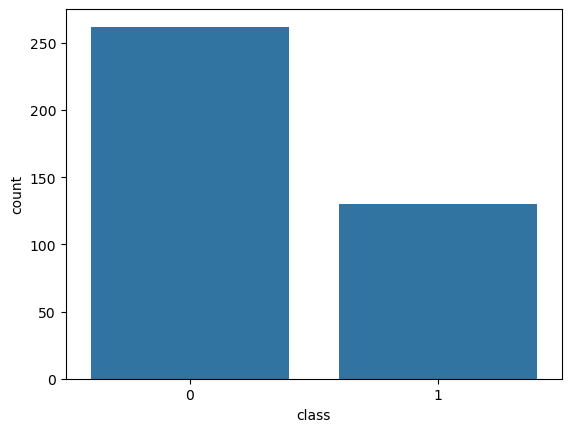

In [34]:
sb.countplot(data= df, x = 'class')
plt.show()

In [ ]:
# 예측하려는 컬럼의 데이터를 확인했더니, 불균형이 심한경우는 두가지방법이용
# 데이터를 버리고 하는 방법 sampling . 데이터를 늘리는 방법 up sampling

In [35]:
! pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [imblearn]d-learn]


In [36]:
from imblearn.over_sampling import SMOTE

In [37]:
sm = SMOTE(random_state= 99)

In [38]:
X.shape

(392, 8)

In [39]:
y.shape

(392,)

In [41]:
X, y = sm.fit_resample(X, y)

In [42]:
X.shape

(524, 8)

In [44]:
y.value_counts()

class
0    262
1    262
Name: count, dtype: int64

In [47]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [48]:
X_scaler = StandardScaler()

In [50]:
X = X_scaler.fit_transform(X)

In [51]:
y

0      0
1      1
2      1
3      1
4      1
      ..
519    1
520    1
521    1
522    1
523    1
Name: class, Length: 524, dtype: int64

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
classifier = LogisticRegression(random_state= 99)

In [56]:
classifier.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,99
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [58]:
y_pred = classifier.predict(X_test)

In [59]:
y_test

247    0
86     1
71     0
312    0
99     1
      ..
28     0
51     1
111    0
303    0
479    1
Name: class, Length: 105, dtype: int64

In [60]:
y_pred

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1])

In [61]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [63]:
cm = confusion_matrix(y_test, y_pred)

In [64]:
cm

array([[41, 10],
       [12, 42]])

In [65]:
accuracy_score(y_test, y_pred)

0.7904761904761904